# Task 1: Classification

1. define a Neural Network
2. define optimization procedure on FashionMNIST
3. train classifier on training set
4. evaluate model on test set
    - compute confusion matrix
    - compute Accuracy, Precision, Recall and F1 using the maximum response
    - visualize Precision-Recall curve for different classes 
    - visualize example images with predicted classes

In [17]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from utils import NoisyFashionMNIST

%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

## Dataset: 
Downloads the FashionMNIST dataset in your local directory ./data  
The following code shows how to access and visualize the data.

In [3]:
transform=transforms.Compose([
        transforms.ToTensor()])

train_dataset = datasets.FashionMNIST("./data", train = True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST("./data", train = False, download=True, transform=transform)
idx_to_class = {v: k for k, v in train_dataset.class_to_idx.items()}

['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


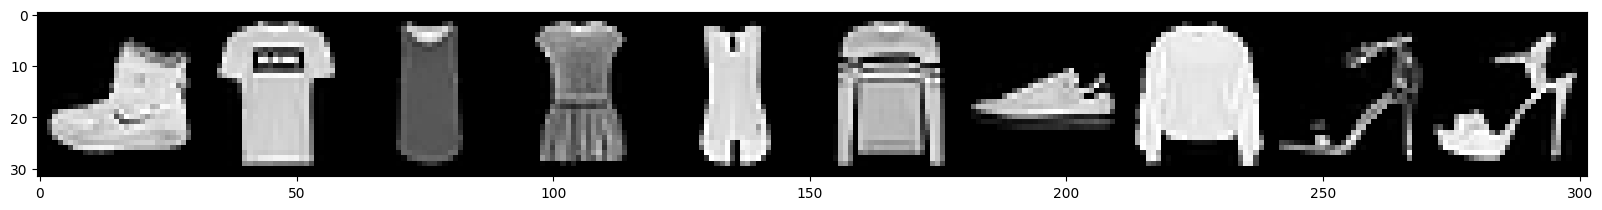

In [4]:
x = [train_dataset[i][0] for i in range(10)]
labels = [idx_to_class[train_dataset[i][1]] for i in range(10)]
print(labels)

plt.figure(figsize=(20,10))
show(torchvision.utils.make_grid(x, nrow=10))
plt.show()

In [6]:
# Task 1.1: Define a convolutional neural network

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Task 1.2: define optimization procedure on FashionMNIST

import torch.optim as optim

net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Task 1.3: Train the network on FashionMNIST

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

criterion = nn.CrossEntropyLoss()

for epoch in range(20):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
    
            # zero the parameter gradients
            optimizer.zero_grad()
    
            # forward pass
            predictions = net(inputs)
            loss = criterion(predictions, labels)
            # backward pass
            loss.backward()
            # optimize
            optimizer.step()
    
            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0




        

[1,  2000] loss: 1.502
[1,  4000] loss: 0.828
[1,  6000] loss: 0.690
[1,  8000] loss: 0.626
[1, 10000] loss: 0.565
[1, 12000] loss: 0.541
[1, 14000] loss: 0.506
[2,  2000] loss: 0.456
[2,  4000] loss: 0.448
[2,  6000] loss: 0.442
[2,  8000] loss: 0.421
[2, 10000] loss: 0.411
[2, 12000] loss: 0.415
[2, 14000] loss: 0.408
[3,  2000] loss: 0.381
[3,  4000] loss: 0.378
[3,  6000] loss: 0.364
[3,  8000] loss: 0.368
[3, 10000] loss: 0.359
[3, 12000] loss: 0.365
[3, 14000] loss: 0.347
[4,  2000] loss: 0.349
[4,  4000] loss: 0.325
[4,  6000] loss: 0.332
[4,  8000] loss: 0.328
[4, 10000] loss: 0.336
[4, 12000] loss: 0.352
[4, 14000] loss: 0.330
[5,  2000] loss: 0.312
[5,  4000] loss: 0.321
[5,  6000] loss: 0.317
[5,  8000] loss: 0.310
[5, 10000] loss: 0.322
[5, 12000] loss: 0.308
[5, 14000] loss: 0.319
[6,  2000] loss: 0.292
[6,  4000] loss: 0.300
[6,  6000] loss: 0.302
[6,  8000] loss: 0.302
[6, 10000] loss: 0.305
[6, 12000] loss: 0.301
[6, 14000] loss: 0.304
[7,  2000] loss: 0.273
[7,  4000] 

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

<Figure size 1000x1000 with 0 Axes>

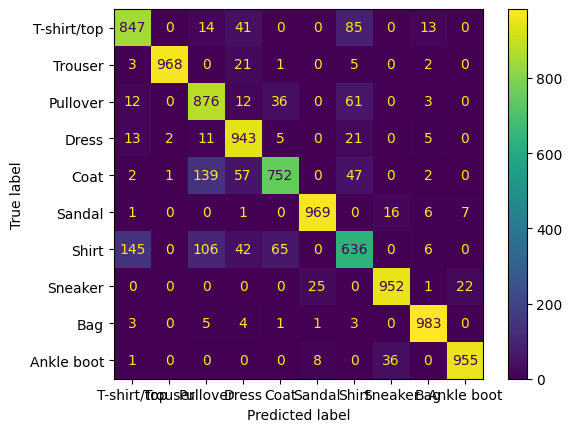

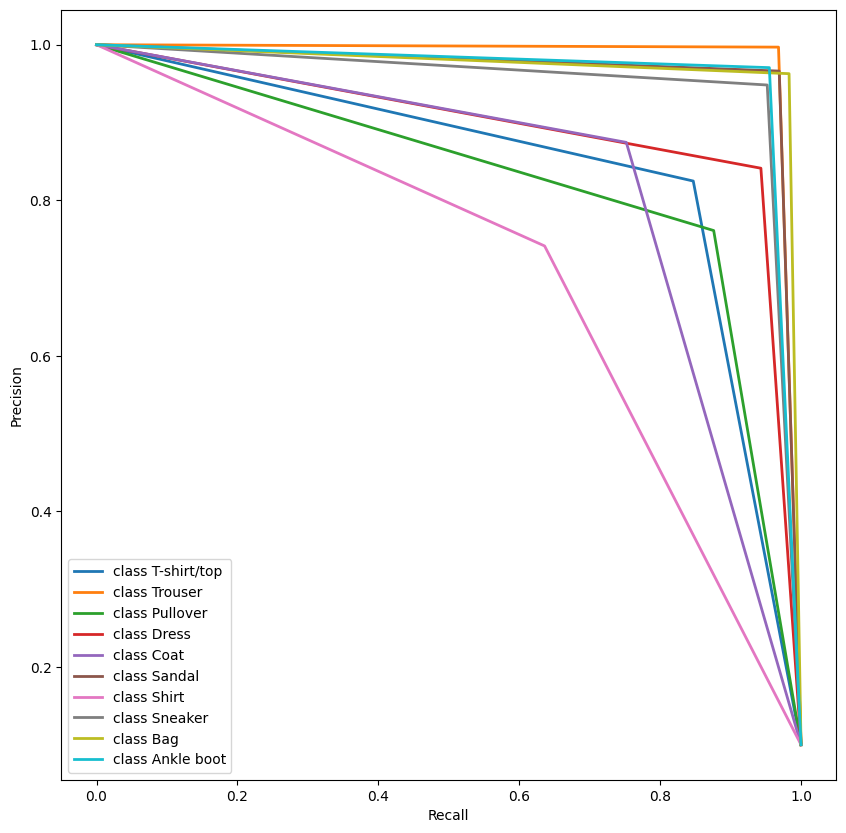

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


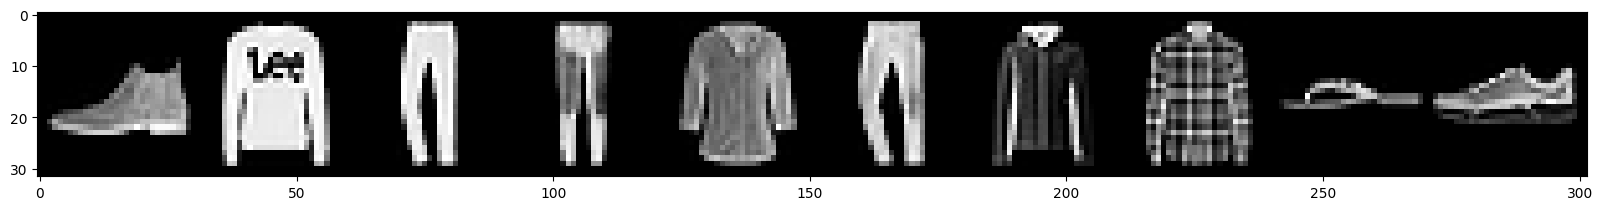

In [16]:
# Task 1.4: Evaluate the network on FashionMNIST

correct = 0
total = 0
predictions = []
y_true = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        output = net(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predictions.extend(predicted)
        y_true.extend(labels)

# a) Compute confusion matrix

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_true, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[idx_to_class[i] for i in range(10)]).plot()

# b) Compute Accuracy, Precision, Recall and F1 using the maximum response


accuracy = accuracy_score(y_true, predictions)
precision = precision_score(y_true, predictions, average='macro')
recall = recall_score(y_true, predictions, average='macro')
f1 = f1_score(y_true, predictions, average='macro')


# c) Visualize Precision-Recall curve for different classes

y_true_bin  = label_binarize(y_true, classes=[i for i in range(10)])
predictions_bin = label_binarize(predictions, classes=[i for i in range(10)])

plt.figure(figsize=(10,10))
precision = dict()
recall = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], predictions_bin[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(idx_to_class[i]))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


# d) Visualize example images with predicted classes

x = [test_dataset[i][0] for i in range(10)]
labels = [idx_to_class[test_dataset[i][1]] for i in range(10)]
print(labels)

plt.figure(figsize=(20,10))
show(torchvision.utils.make_grid(x, nrow=10))
plt.show()

# Task 2: Image Denoising
1. define a Neural Network
2. define optimization procedure on NoisyFashionMNIST
3. train denoising model
4. Evaluate model

## Dataset
Random augmentations are added to the original dataset.

In [21]:
train_dataset = NoisyFashionMNIST("./data", True)
test_dataset = NoisyFashionMNIST("./data", False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


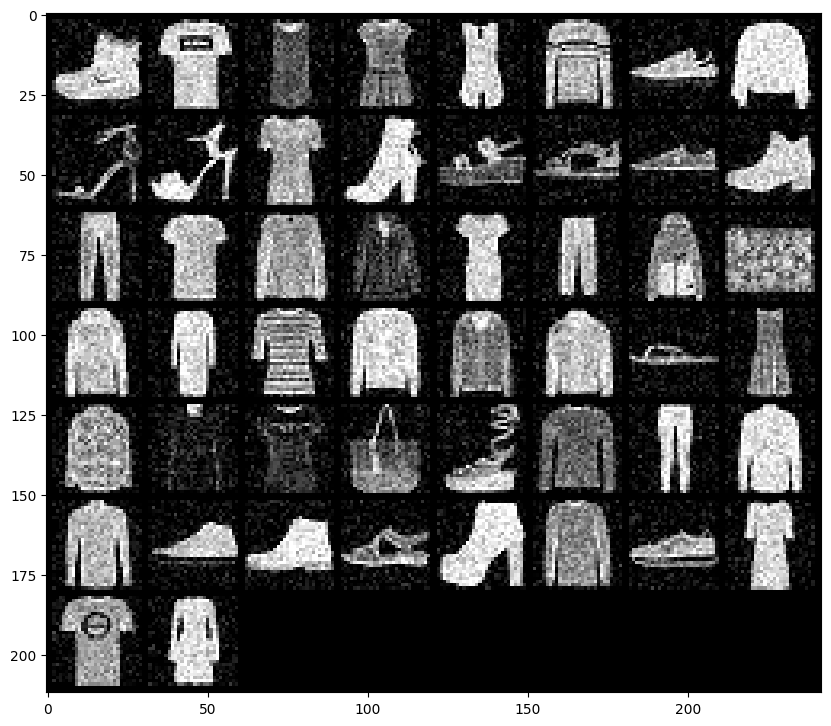

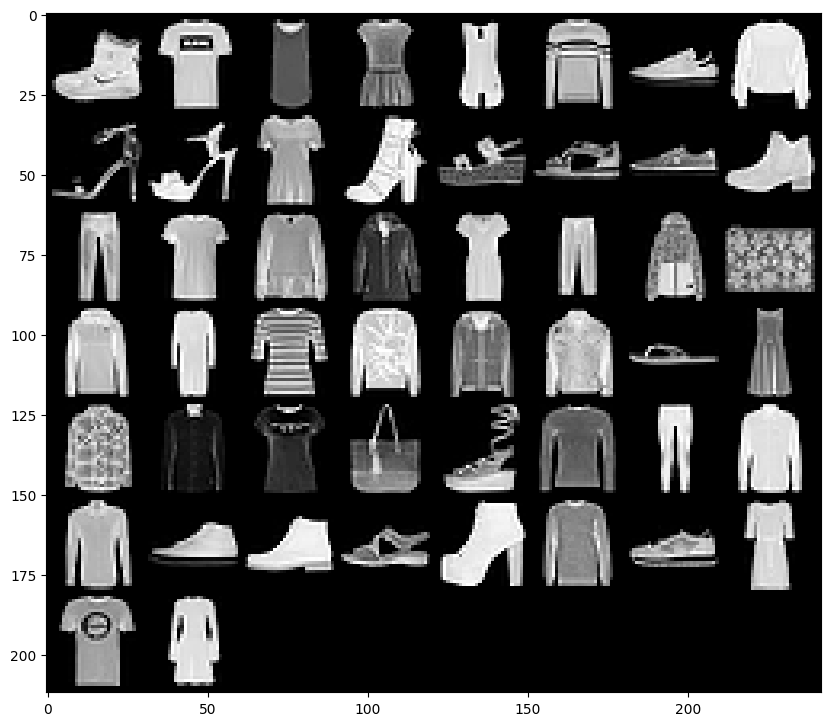

In [19]:
x = [train_dataset[i][0] for i in range(50)]
y = [train_dataset[i][1] for i in range(50)]

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(x))
plt.show()

plt.figure(figsize=(10,10))
show(torchvision.utils.make_grid(y))
plt.show()

In [26]:
class DenoiseCNN(nn.Module):

    # Task 2.1: Define a convolutional neural network for denoising
    # create an autoencoder architecture with 3 encoder and 3 decoder layers
    def __init__(self):
        super(DenoiseCNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)

        self.fc4 = nn.Linear(32, 64)
        self.fc5 = nn.Linear(64, 128)
        self.fc6 = nn.Linear(128, 28*28)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def encode(self, x):
        h1 = self.relu(self.fc1(x))
        h2 = self.relu(self.fc2(h1))
        h3 = self.relu(self.fc3(h2))
        return h3

    def decode(self, x):
        h4 = self.relu(self.fc4(x))
        h5 = self.relu(self.fc5(h4))
        h6 = self.sigmoid(self.fc6(h5))
        return h6

    def forward(self, x):
        q = self.encode(x.view(-1, 28*28))
        return self.decode(q).view(-1, 1, 28, 28)

denoiser = DenoiseCNN()

In [27]:
# Task 2.2: Define optimization procedure for denoising
optimizer = optim.Adam(denoiser.parameters(), lr=0.001)


In [ ]:
# Task 2.3: Train the denoising network

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

criterion = nn.MSELoss()


for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        predictions = denoiser(inputs)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
        

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Average MSE: 0.0131


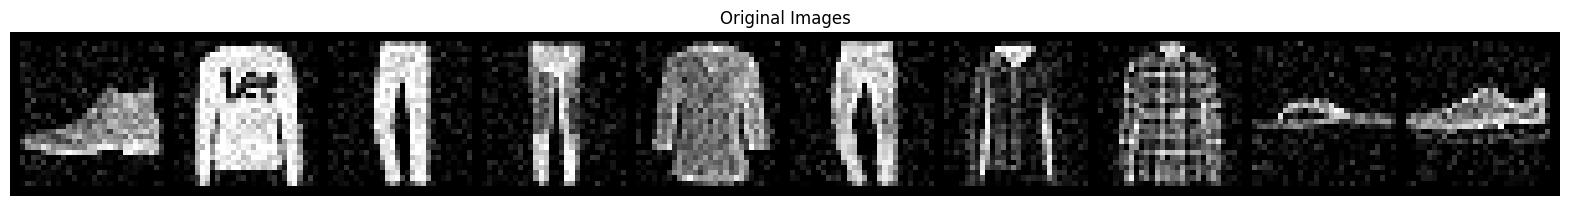

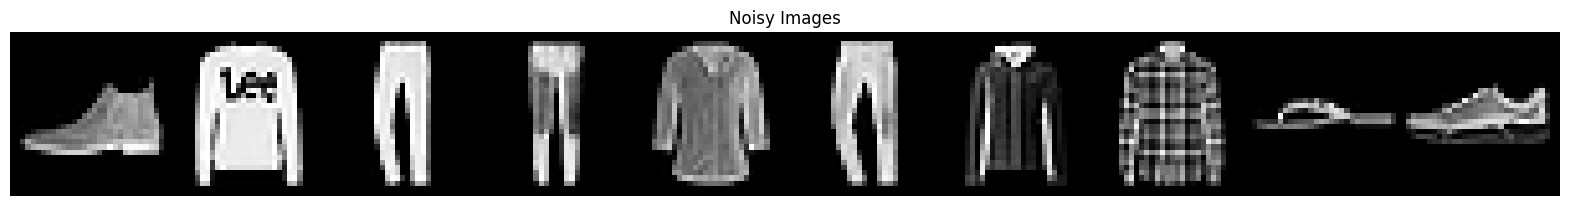

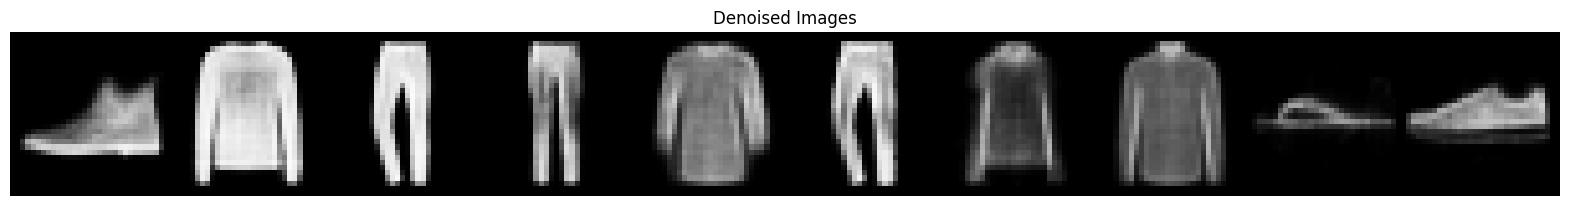

In [38]:
# Task 2.4: Evaluate the denoising network

def evaluate_denoising(denoiser, test_loader):
    denoiser.eval()
    total_mse = 0
    count = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = denoiser(images)
            total_mse += nn.functional.mse_loss(outputs, labels).item()
            count += 1

    average_mse = total_mse / count
    print(f'Average MSE: {average_mse:.4f}')

# Calling the evaluation function
evaluate_denoising(denoiser, test_loader)

# Displaying images for visual comparison
def show_images(images, title):
    # Assuming 'images' is a list of tensors already in the correct format
    images = torch.stack(images)  # Stacks tensors along a new dimension
    images = torchvision.utils.make_grid(images, nrow=10)
    plt.figure(figsize=(20, 10))
    plt.imshow(images.permute(1, 2, 0))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show original, noisy, and denoised images
# Show original, noisy, and denoised images
show_images([test_dataset[i][0] for i in range(10)], "Noisy Images")
show_images([test_dataset[i][1] for i in range(10)], "Original Images")
denoised_images = [denoiser(test_dataset[i][1].unsqueeze(0)).squeeze(0).detach() for i in range(10)]
show_images(denoised_images, "Denoised Images")

# Task 3: Model Selection

Conduct at least **3 experiments** for **each** of the previous tasks and document them (i.e. at least 6 experiments).  
Evaluate the effect of different parameters on the classification and denoising tasks.  
Conduct the following experiments:
- Evaluate the effect of residual connections
- Evaluate the effect of the depth(number of layers)/width (number of channels or number of neurons) of the network  
- Evaluate the effect of Batch normalization

## Optional experiments:
- How does the loss function affect denoising? Alternative loss functions: MSE, MAE, SSIM?
- How does Dropout affect the performance?
- Use different downsampling/upsampling layers, e.g.pooling, strided convolution, transposed convolution, etc.  
- Feel free to explore more variations of your model and training.